In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/processed/df_2009-2020Total.csv')

In [3]:
categorical_features = [
        'SDDSRVYR','RIAGENDR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2','RIDEXPRG', 'DMDMARTZ',
        'ALQ111', 'ALQ121', 'ALQ142','ALQ151','BPQ020','BPQ040A','BPQ050A','BPQ080','BPQ090D',
        'DIQ160','DIQ010','DBQ197','DBQ700','HIQ011','INDFMMPC','MCQ080','MCQ160B','MCQ160C','MCQ160M','MCQ300C',
        'DPQ020','DPQ030','DPQ040','DPQ060','DPQ070','PAQ605','PAQ620','PAQ635','PAQ650','PAQ665','SLQ120',
        'SMQ020','SMQ040','Diabetes_Status','Insulin_Resistance'
    ]

columns_to_drop_1 = [
    "LBXHSCRP", "SLQ120", "ALQ111", "SMD030", "SMQ040", "LBDFERSI",
    "BPQ040A", "BPQ050A", "RIDEXPRG", "SMD650", "DID040", "DBD041", "DBD030","INDFMPIR","LBXTR","BPQ090D",
    "WTSAFPRP","WTMECPRP",'WTINTPRP'
]

df.drop(columns=columns_to_drop_1, inplace=True)

categorical_features = [col for col in categorical_features if col not in columns_to_drop_1]
numerical_features = [col for col in df.columns if col not in categorical_features]

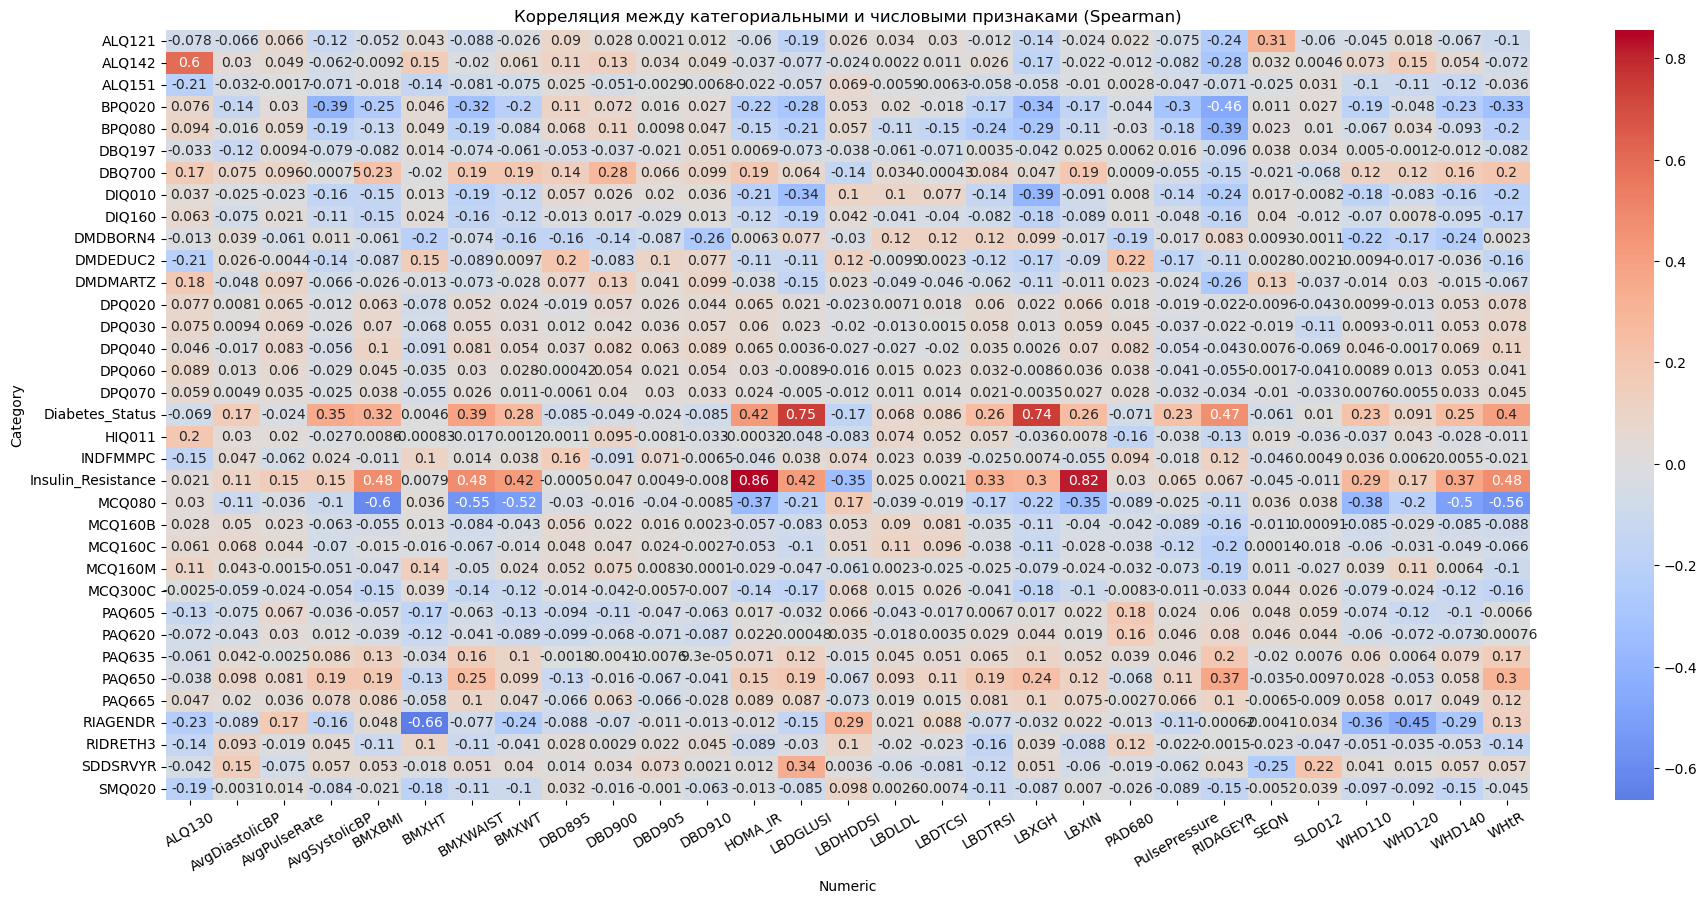

In [ ]:


# 
correlation_results = []

for cat_col in categorical_features:
    for num_col in numerical_features:
        df_filtered = df[[cat_col, num_col]].dropna()  
        if df_filtered[cat_col].nunique() > 1:  # проверка больше 1 категории
            corr, p_value = spearmanr(df_filtered[cat_col], df_filtered[num_col])
            correlation_results.append((cat_col, num_col, corr))  # 

# DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Category', 'Numeric', 'Correlation'])

# delet NaN
correlation_df = correlation_df.dropna()

# pivot_table 
heatmap_data = correlation_df.pivot(index='Category', columns='Numeric', values='Correlation')

# 
plt.figure(figsize=(22, 10))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0)
plt.title("Корреляция между категориальными и числовыми признаками (Spearman)")
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.show()